Unsupervised Learning is without lables  
ex) Clustering (Recommendation Engines, Search Engines, Market Segmentation)

### Iris

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
samples = iris.data
samples

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

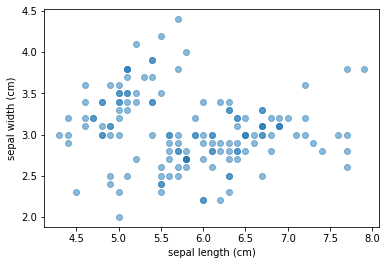

In [2]:
x = samples[:, 0]    #sepal length
y = samples[:, 1]    #sepal width

plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

[(5.852175868520335, 2.3148265335659826), (4.640869644971688, 3.61388209027226), (6.494317327576544, 2.9148398606842743)]


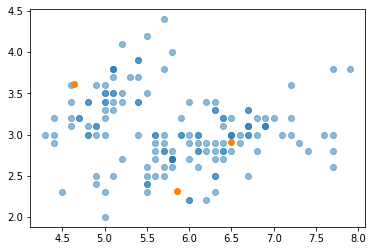

In [3]:
#step 1 : place k random centroids(center value)
#k means 3 species
k = 3
#create 3 random x, y coordinates between min value and max value
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))
print(centroids)

plt.scatter(x, y, alpha=0.5)    #data are blue
plt.scatter(centroids_x, centroids_y)    #centroids are orange
plt.show()

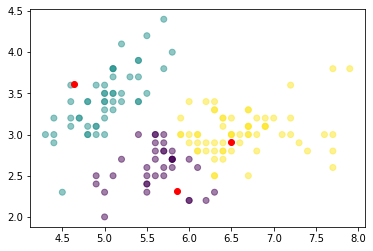

In [4]:
#step 2 : assign data to nearest centroid
#calculate euclid distance (each data are vector)
def distance(a, b) :
    return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a, b))])**0.5

#create labels that grouping each data points
labels = np.zeros(len(samples))
sepal_length_width = np.array(list(zip(x, y)))

#calculate each data points' euclid distance from centroids
for i in range(len(samples)) :
    distances = np.zeros(k)    #[0. 0. 0.]
    for j in range(k) :
        distances[j] = distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances)    #return min index (the closest centroid)
    labels[i] = cluster

#show which data is included in which centroid group
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')
plt.show()

[array([5.61666667, 2.59722222]), array([5.006, 3.428]), array([6.625    , 3.0265625])]
<class 'list'>
[(5.852175868520335, 2.3148265335659826), (4.640869644971688, 3.61388209027226), (6.494317327576544, 2.9148398606842743)]
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


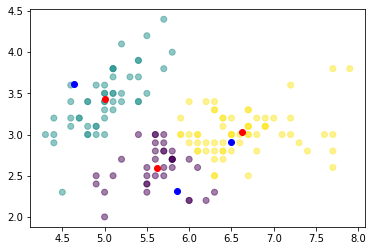

In [5]:
#step 3 : update centroids
from copy import deepcopy
centroids_old = deepcopy(centroids)

#update centroids by calculate each group's mean of (x, y)
for i in range(k) :
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

print(centroids)
print(type(centroids))
print(centroids_old)
print(type(centroids_old))

#compare old centroids to new centroids
centroids = np.array(centroids)
centroids_old = np.array(centroids_old)
print(type(centroids))
print(type(centroids_old))
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')    #centroids moved to center
plt.scatter(centroids_old[:, 0], centroids_old[:, 1], c='blue')
plt.show()

In [6]:
#step 4 : repeat step 2-3 until convergence
#initialize centroids_old, labels, error
centroids_old = np.zeros(centroids.shape)
labels = np.zeros(len(samples))
error = np.zeros(k)

#calculate error which is distance between old and new centroids
for i in range(k) :
    error[i] = distance(centroids_old[i], centroids[i])

In [7]:
#find optimal centroids
while error.all() != 0 :
    #step 2 : assign data to nearest centroid
    for i in range(len(samples)) :
        distances = np.zeros(k)
        for j in range(k) :
            distances[j] = distance(sepal_length_width[i], centroids[j])
        cluster = np.argmin(distances)
        labels[i] = cluster
    
    #step 3 : update centroids
    centroids_old = deepcopy(centroids)
    for i in range(k) :
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        centroids[i] = np.mean(points, axis=0)
    
    #recalculate error
    for i in range(k) :
        error[i] = distance(centroids_old[i], centroids[i])

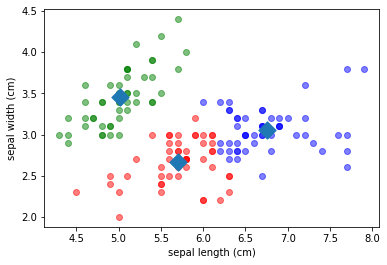

In [8]:
colors = ['r', 'g', 'b']
for i in range(k) :
    points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

### Palmer Penguins

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

#Simplified data for 3 penguin species (Chinstrap, Adelie, Gentoo) from original penguin data sets
df = pd.read_csv('C:/Users/Sunwoo/datasets/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


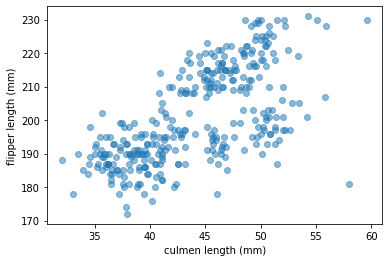

In [2]:
df = df.dropna()
dataset = df.values
x = dataset[:, 2]    #culmen_length_mm
y = dataset[:, 4]    #flipper_length_mm

plt.scatter(x, y, alpha=0.5)
plt.xlabel('culmen length (mm)')
plt.ylabel('flipper length (mm)')
plt.show()

[(52.578107267377156, 200.0280604779135), (36.52203530630212, 219.32198061457723), (45.79971048285885, 206.6632548831377)]


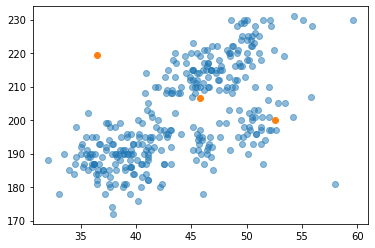

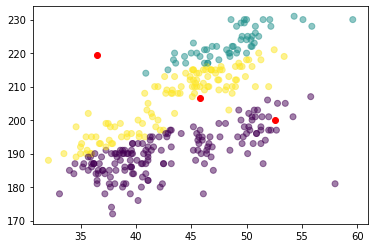

[array([ 42.85121951, 190.24390244]), array([ 48.63333333, 222.90740741]), array([ 43.45086207, 206.05172414])]
<class 'list'>
[(52.578107267377156, 200.0280604779135), (36.52203530630212, 219.32198061457723), (45.79971048285885, 206.6632548831377)]
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


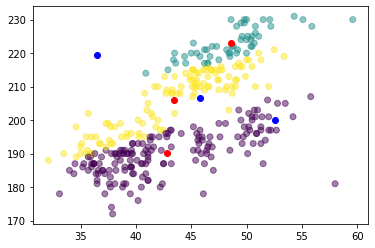

In [3]:
#step 1 : place k random centroids(center value)
#k means 3 species
k = 3
#create 3 random x, y coordinates between min value and max value
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))
print(centroids)

plt.scatter(x, y, alpha=0.5)    #data are blue
plt.scatter(centroids_x, centroids_y)    #centroids are orange
plt.show()

#step 2 : assign data to nearest centroid
#calculate euclid distance (each data are vector)
def distance(a, b) :
    return sum([(el_a - el_b)**2 for el_a, el_b in list(zip(a, b))])**0.5

#create labels that grouping each data points
labels = np.zeros(len(dataset))
sepal_length_width = np.array(list(zip(x, y)))

#calculate each data points' euclid distance from centroids
for i in range(len(dataset)) :
    distances = np.zeros(k)    #[0. 0. 0.]
    for j in range(k) :
        distances[j] = distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances)    #return min index (the closest centroid)
    labels[i] = cluster

#show which data is included in which centroid group
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')
plt.show()

#step 3 : update centroids
centroids_old = deepcopy(centroids)

#update centroids by calculate each group's mean of (x, y)
for i in range(k) :
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

print(centroids)
print(type(centroids))
print(centroids_old)
print(type(centroids_old))

#compare old centroids to new centroids
centroids = np.array(centroids)
centroids_old = np.array(centroids_old)
print(type(centroids))
print(type(centroids_old))
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')    #centroids moved to center
plt.scatter(centroids_old[:, 0], centroids_old[:, 1], c='blue')
plt.show()

#step 4 : repeat step 2-3 until convergence
#initialize centroids_old, labels, error
centroids_old = np.zeros(centroids.shape)
labels = np.zeros(len(dataset))
error = np.zeros(k)

#calculate error which is distance between old and new centroids
for i in range(k) :
    error[i] = distance(centroids_old[i], centroids[i])

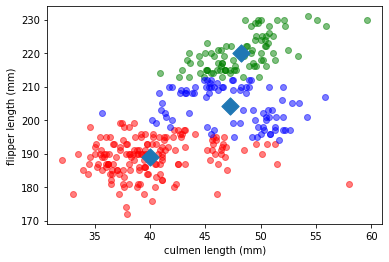

In [4]:
#find optimal centroids
while error.all() != 0 :
    #step 2 : assign data to nearest centroid
    for i in range(len(dataset)) :
        distances = np.zeros(k)
        for j in range(k) :
            distances[j] = distance(sepal_length_width[i], centroids[j])
        cluster = np.argmin(distances)
        labels[i] = cluster
    
    #step 3 : update centroids
    centroids_old = deepcopy(centroids)
    for i in range(k) :
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        centroids[i] = np.mean(points, axis=0)
    
    #recalculate error
    for i in range(k) :
        error[i] = distance(centroids_old[i], centroids[i])

colors = ['r', 'g', 'b']
for i in range(k) :
    points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
plt.xlabel('culmen length (mm)')
plt.ylabel('flipper length (mm)')
plt.show()

### K-Means Library

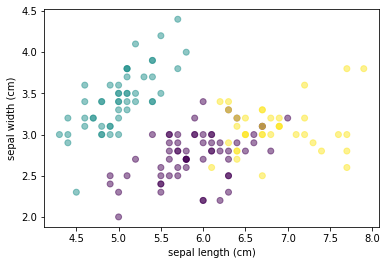

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()
samples = iris.data
#graph seems a little bit different from before because samples includes 4 attributes
#to make the same way slice 2 attributes
#samples = iris.data[:, 0:2]

#create k-means model that divide data into 3 groups
model = KMeans(n_clusters = 3)
#run k-means clustering
model.fit(samples)
#assign unlabeled data to each group
labels = model.predict(samples)

x = samples[:, 0]
y = samples[:, 1]
plt.scatter(x, y, c=labels, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [2]:
#target is class
target = iris.target
species = np.chararray(target.shape, itemsize=150)
for i in range(len(samples)) :
    if target[i] == 0 :
        species[i] = 'setosa'
    elif target[i] == 1 :
        species[i] = 'versicolor'
    elif target[i] == 2 :
        species[i] = 'virginica'

#evaluate by cross-tabulation
df = pd.DataFrame({'labels':labels, 'species':species})
#labels is unsupervised data, species is original data
ct = pd.crosstab(df['labels'], df['species'])
print(ct)    #100%, 77%, 96% right

species  b'setosa'  b'versicolor'  b'virginica'
labels                                         
0                0             48            14
1               50              0             0
2                0              2            36


C:\Users\Sunwoo\anaconda3\envs\tf_2_5\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


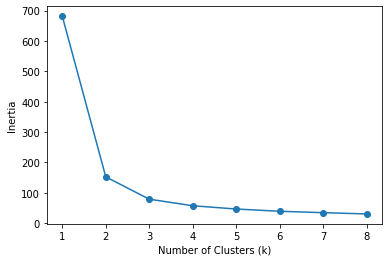

In [3]:
num_clusters = list(range(1, 9))    #1 <= k <= 8
inertias = []

#measure inertia
for i in num_clusters :
    model = KMeans(n_clusters=i)
    model.fit(samples)
    inertias.append(model.inertia_)

#how to decide the optimal number of clusters? elbow method
#graph below seems the optimal number of clusters is 3
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()